## 🥐 Bakery Day of Sale Prediction

Given *data about bakery sales*, let's try to predict whether a given day of sale is a **weekend** or not.

We will use a logistic regression model to make our predictions.

Data source: https://www.kaggle.com/datasets/hosubjeong/bakery-sales

### Importing Libraries

In [25]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv('archive/Bakery Sales.csv')
data

,datetime,day of week,total,place,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,croque monsieur,mad garlic,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11 15:35,Thur,23800.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,2019-07-11 16:10,Thur,15800.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2019-07-12 11:49,Fri,58000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-13 13:19,Sat,14800.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,2019-07-13 13:22,Sat,15600.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2654 entries, 0 to 2653
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            2421 non-null   object 
 1   day of week         2420 non-null   object 
 2   total               2420 non-null   float64
 3   place               2166 non-null   object 
 4   angbutter           1973 non-null   float64
 5   plain bread         857 non-null    float64
 6   jam                 220 non-null    float64
 7   americano           412 non-null    float64
 8   croissant           747 non-null    float64
 9   caffe latte         193 non-null    float64
 10  tiramisu croissant  779 non-null    float64
 11  cacao deep          323 non-null    float64
 12  pain au chocolat    587 non-null    float64
 13  almond croissant    202 non-null    float64
 14  croque monsieur     0 non-null      float64
 15  mad garlic          0 non-null      float64
 16  milk t

### Preprocessing

In [32]:
df = data.copy()

In [33]:
df.isna().mean()

datetime              0.087792
day of week           0.088169
total                 0.088169
place                 0.183873
angbutter             0.256594
plain bread           0.677091
jam                   0.917106
americano             0.844763
croissant             0.718538
caffe latte           0.927280
tiramisu croissant    0.706481
cacao deep            0.878297
pain au chocolat      0.778824
almond croissant      0.923888
croque monsieur       1.000000
mad garlic            1.000000
milk tea              0.948380
gateau chocolat       0.926149
pandoro               0.870761
cheese cake           0.966089
lemon ade             0.986812
orange pound          0.804446
wiener                0.866240
vanila latte          0.921251
berry ade             0.979653
tiramisu              0.997362
merinque cookies      0.982291
dtype: float64

In [34]:
df['place'].unique()

array([nan, '효자 3동', '후평 1동', '후평 2동', '석사동', '소양동', '퇴계동', '동면', '후평 3동',
       '신사우동', '강남동', '효자 1동', '조운동', '교동', '효자 2동', '약사명동', '근화동', '동내면',
       '교동 ', '신동면'], dtype=object)

In [35]:
# Drop place column
df = df.drop('place', axis=1)

In [36]:
df

,datetime,day of week,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,croque monsieur,mad garlic,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11 15:35,Thur,23800.0,1.0,NaN,NaN,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,2019-07-11 16:10,Thur,15800.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2019-07-12 11:49,Fri,58000.0,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-13 13:19,Sat,14800.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,2019-07-13 13:22,Sat,15600.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Drop rows without sales or date information
missing_rows = df[df[['datetime', 'day of week', 'total']].isna().any(axis=1)].index
df = df.drop(missing_rows, axis=0).reset_index(drop=True)
df

,datetime,day of week,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,croque monsieur,mad garlic,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11 15:35,Thur,23800.0,1.0,NaN,NaN,1.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,2019-07-11 16:10,Thur,15800.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2019-07-12 11:49,Fri,58000.0,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-07-13 13:19,Sat,14800.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,2019-07-13 13:22,Sat,15600.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2020-05-02 11:37,Sat,19500.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2416,2020-05-02 11:39,Sat,19800.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2417,2020-05-02 12:15,Sat,14300.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2418,2020-05-02 13:45,Sat,15000.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Fill remaining missing values with 0
df = df.fillna(0)
df

,datetime,day of week,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,croque monsieur,mad garlic,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11 15:35,Thur,23800.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2019-07-11 16:10,Thur,15800.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2019-07-12 11:49,Fri,58000.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-07-13 13:19,Sat,14800.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2019-07-13 13:22,Sat,15600.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2020-05-02 11:37,Sat,19500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2416,2020-05-02 11:39,Sat,19800.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2417,2020-05-02 12:15,Sat,14300.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2418,2020-05-02 13:45,Sat,15000.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Drop single-valued columns
df = df.drop(['croque monsieur', 'mad garlic'], axis=1)

In [40]:
df.groupby(by='day of week').mean(numeric_only=True)

,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
day of week,,,,,,,,,,,,,,,,,,,,,,
Fri,24484.131737,1.365269,0.422156,0.107784,0.176647,0.508982,0.065868,0.380240,0.131737,0.266467,0.119760,0.062874,0.074850,0.176647,0.047904,0.023952,0.305389,0.197605,0.101796,0.026946,0.000000,0.011976
Mon,20791.566265,1.262048,0.370482,0.090361,0.153614,0.496988,0.105422,0.469880,0.153614,0.358434,0.099398,0.075301,0.069277,0.177711,0.030120,0.012048,0.225904,0.183735,0.099398,0.024096,0.003012,0.018072
Sat,20128.318584,1.252212,0.409292,0.115044,0.207965,0.438053,0.092920,0.415929,0.161504,0.296460,0.075221,0.042035,0.099558,0.183628,0.042035,0.024336,0.192478,0.199115,0.077434,0.022124,0.008850,0.022124
Sun,20346.028881,1.276173,0.458484,0.088448,0.292419,0.379061,0.088448,0.324910,0.173285,0.267148,0.090253,0.075812,0.075812,0.146209,0.043321,0.007220,0.243682,0.207581,0.115523,0.023466,0.003610,0.018051
Thur,21144.675325,1.477922,0.420779,0.122078,0.192208,0.407792,0.096104,0.425974,0.119481,0.298701,0.088312,0.051948,0.101299,0.145455,0.023377,0.007792,0.231169,0.212987,0.106494,0.025974,0.000000,0.025974
Tues,18666.666667,1.333333,0.000000,0.000000,0.333333,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.333333
Wed,21085.000000,1.411111,0.452778,0.097222,0.200000,0.413889,0.080556,0.355556,0.150000,0.336111,0.122222,0.091667,0.097222,0.155556,0.036111,0.022222,0.216667,0.166667,0.094444,0.013889,0.000000,0.022222


In [41]:
list(df.groupby(by='day of week'))

[('Fri',
                datetime day of week    total  angbutter  plain bread  jam  \
  2     2019-07-12 11:49         Fri  58000.0        0.0          0.0  0.0   
  26    2019-07-19 11:43         Fri  14800.0        1.0          0.0  0.0   
  27    2019-07-19 12:11         Fri  15800.0        1.0          0.0  0.0   
  28    2019-07-19 12:36         Fri  21800.0        1.0          0.0  0.0   
  29    2019-07-19 12:44         Fri  20600.0        2.0          0.0  0.0   
  ...                ...         ...      ...        ...          ...  ...   
  2410  2020-05-01 12:10         Fri  18300.0        1.0          1.0  0.0   
  2411  2020-05-01 13:05         Fri  28400.0        4.0          1.0  0.0   
  2412  2020-05-01 13:55         Fri  21300.0        1.0          0.0  0.0   
  2413  2020-05-01 15:03         Fri  14800.0        1.0          0.0  0.0   
  2414  2020-05-01 15:19         Fri  14500.0        0.0          1.0  0.0   
  
        americano  croissant  caffe latte  tiramisu 

In [42]:
df.groupby('day of week').sum(numeric_only=True)

,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
day of week,,,,,,,,,,,,,,,,,,,,,,
Fri,8177700.0,456.0,141.0,36.0,59.0,170.0,22.0,127.0,44.0,89.0,40.0,21.0,25.0,59.0,16.0,8.0,102.0,66.0,34.0,9.0,0.0,4.0
Mon,6902800.0,419.0,123.0,30.0,51.0,165.0,35.0,156.0,51.0,119.0,33.0,25.0,23.0,59.0,10.0,4.0,75.0,61.0,33.0,8.0,1.0,6.0
Sat,9098000.0,566.0,185.0,52.0,94.0,198.0,42.0,188.0,73.0,134.0,34.0,19.0,45.0,83.0,19.0,11.0,87.0,90.0,35.0,10.0,4.0,10.0
Sun,11271700.0,707.0,254.0,49.0,162.0,210.0,49.0,180.0,96.0,148.0,50.0,42.0,42.0,81.0,24.0,4.0,135.0,115.0,64.0,13.0,2.0,10.0
Thur,8140700.0,569.0,162.0,47.0,74.0,157.0,37.0,164.0,46.0,115.0,34.0,20.0,39.0,56.0,9.0,3.0,89.0,82.0,41.0,10.0,0.0,10.0
Tues,56000.0,4.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0
Wed,7590600.0,508.0,163.0,35.0,72.0,149.0,29.0,128.0,54.0,121.0,44.0,33.0,35.0,56.0,13.0,8.0,78.0,60.0,34.0,5.0,0.0,8.0


In [43]:
def drop_time_information(x):
    new_string = re.sub(r' \d+:\d+$', '', x)
    return new_string

In [44]:
# Remove time information from date time column
df['datetime'] = df['datetime'].apply(lambda x: drop_time_information(x))

In [45]:
df

,datetime,day of week,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11,Thur,23800.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2019-07-11,Thur,15800.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2019-07-12,Fri,58000.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-07-13,Sat,14800.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2019-07-13,Sat,15600.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2020-05-02,Sat,19500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2416,2020-05-02,Sat,19800.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2417,2020-05-02,Sat,14300.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2418,2020-05-02,Sat,15000.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# Save a copy of the datetime and day of week columns
day_mapping = df[['datetime', 'day of week']].copy()

# Group by date
df = df.groupby(by='datetime', as_index=False).sum(numeric_only=True)

In [47]:
df

,datetime,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
0,2019-07-11,39600.0,2.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,2019-07-12,58000.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-07-13,117400.0,8.0,3.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0
3,2019-07-14,212000.0,15.0,0.0,1.0,3.0,0.0,1.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0
4,2019-07-15,30900.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2020-04-27,264600.0,11.0,7.0,1.0,3.0,8.0,1.0,8.0,6.0,6.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0
245,2020-04-29,118100.0,7.0,7.0,0.0,1.0,2.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
246,2020-04-30,134100.0,7.0,3.0,0.0,2.0,1.0,0.0,4.0,2.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0
247,2020-05-01,215700.0,15.0,4.0,0.0,4.0,5.0,1.0,6.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0


In [48]:
# Recreate the day of week values from day_mapping
day_mapping

,datetime,day of week
0,2019-07-11,Thur
1,2019-07-11,Thur
2,2019-07-12,Fri
3,2019-07-13,Sat
4,2019-07-13,Sat
...,...,...
2415,2020-05-02,Sat
2416,2020-05-02,Sat
2417,2020-05-02,Sat
2418,2020-05-02,Sat


In [55]:
day_mapping[day_mapping['datetime'] == '2019-07-11'].values[0][1]

'Thur'

In [56]:
df['day'] = df['datetime'].apply(lambda x: day_mapping[day_mapping['datetime'] == x].values[0][1])
df

,datetime,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies,day
0,2019-07-11,39600.0,2.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Thur
1,2019-07-12,58000.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fri
2,2019-07-13,117400.0,8.0,3.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,Sat
3,2019-07-14,212000.0,15.0,0.0,1.0,3.0,0.0,1.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,Sun
4,2019-07-15,30900.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Mon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2020-04-27,264600.0,11.0,7.0,1.0,3.0,8.0,1.0,8.0,6.0,6.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,Mon
245,2020-04-29,118100.0,7.0,7.0,0.0,1.0,2.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Wed
246,2020-04-30,134100.0,7.0,3.0,0.0,2.0,1.0,0.0,4.0,2.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,Thur
247,2020-05-01,215700.0,15.0,4.0,0.0,4.0,5.0,1.0,6.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,Fri


In [57]:
# Drop datetime column
df = df.drop('datetime', axis=1)

In [58]:
df

,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies,day
0,39600.0,2.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Thur
1,58000.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fri
2,117400.0,8.0,3.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,Sat
3,212000.0,15.0,0.0,1.0,3.0,0.0,1.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,Sun
4,30900.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Mon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,264600.0,11.0,7.0,1.0,3.0,8.0,1.0,8.0,6.0,6.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,Mon
245,118100.0,7.0,7.0,0.0,1.0,2.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Wed
246,134100.0,7.0,3.0,0.0,2.0,1.0,0.0,4.0,2.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,Thur
247,215700.0,15.0,4.0,0.0,4.0,5.0,1.0,6.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,Fri


In [59]:
# Change day column to be is_weekend
df['is_weekend'] = df['day'].apply(lambda x: 'Weekend' if x == 'Sat' or x == 'Sun' else 'Workday')
df

,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies,day,is_weekend
0,39600.0,2.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Thur,Workday
1,58000.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fri,Workday
2,117400.0,8.0,3.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,Sat,Weekend
3,212000.0,15.0,0.0,1.0,3.0,0.0,1.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,Sun,Weekend
4,30900.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Mon,Workday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,264600.0,11.0,7.0,1.0,3.0,8.0,1.0,8.0,6.0,6.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,Mon,Workday
245,118100.0,7.0,7.0,0.0,1.0,2.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Wed,Workday
246,134100.0,7.0,3.0,0.0,2.0,1.0,0.0,4.0,2.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,Thur,Workday
247,215700.0,15.0,4.0,0.0,4.0,5.0,1.0,6.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,Fri,Workday


In [60]:
df = df.drop('day', axis=1)
df

,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies,is_weekend
0,39600.0,2.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Workday
1,58000.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Workday
2,117400.0,8.0,3.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,Weekend
3,212000.0,15.0,0.0,1.0,3.0,0.0,1.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,Weekend
4,30900.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Workday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,264600.0,11.0,7.0,1.0,3.0,8.0,1.0,8.0,6.0,6.0,0.0,1.0,2.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,Workday
245,118100.0,7.0,7.0,0.0,1.0,2.0,0.0,4.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Workday
246,134100.0,7.0,3.0,0.0,2.0,1.0,0.0,4.0,2.0,2.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,Workday
247,215700.0,15.0,4.0,0.0,4.0,5.0,1.0,6.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,Workday


In [61]:
# Split df into X and y
y = df['is_weekend']
X = df.drop('is_weekend', axis=1)

In [62]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [63]:
X_train

,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
59,301700.0,16.0,3.0,2.0,3.0,8.0,0.0,5.0,5.0,5.0,2.0,0.0,3.0,5.0,0.0,0.0,4.0,5.0,0.0,1.0,0.0,0.0
88,133800.0,6.0,1.0,1.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,3.0,2.0,1.0,0.0,0.0,0.0
239,225400.0,19.0,3.0,0.0,0.0,5.0,0.0,5.0,2.0,8.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
199,305800.0,17.0,8.0,5.0,2.0,10.0,3.0,4.0,2.0,3.0,0.0,2.0,0.0,2.0,2.0,1.0,2.0,0.0,4.0,0.0,0.0,0.0
207,259700.0,11.0,7.0,0.0,2.0,5.0,1.0,6.0,5.0,5.0,2.0,5.0,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,223900.0,10.0,8.0,0.0,6.0,7.0,1.0,6.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,0.0
72,131600.0,6.0,5.0,2.0,3.0,3.0,1.0,1.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0
140,109500.0,5.0,5.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0
235,147000.0,11.0,4.0,0.0,1.0,3.0,0.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0


In [64]:
y_train

59     Weekend
88     Workday
239    Workday
199    Workday
207    Weekend
        ...   
137    Weekend
72     Weekend
140    Workday
235    Workday
37     Weekend
Name: is_weekend, Length: 174, dtype: object

In [65]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train, y_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [66]:
X_train

,total,angbutter,plain bread,jam,americano,croissant,caffe latte,tiramisu croissant,cacao deep,pain au chocolat,almond croissant,milk tea,gateau chocolat,pandoro,cheese cake,lemon ade,orange pound,wiener,vanila latte,berry ade,tiramisu,merinque cookies
59,0.678192,0.475849,-0.355816,0.803853,0.448528,1.173971,-0.847263,0.477323,2.213175,0.966002,0.907976,-0.691405,1.906417,1.948306,-0.542066,-0.309460,0.887850,1.693100,-0.724219,1.603174,-0.132453,-0.442471
88,-0.536114,-1.046168,-1.036169,-0.054248,-0.018801,0.246871,0.091742,-1.089736,-0.345579,-0.458442,0.058579,-0.691405,-0.691885,0.236158,-0.542066,-0.309460,0.345794,0.031825,0.058477,-0.526233,-0.132453,-0.442471
239,0.126366,0.932454,-0.355816,-0.912349,-0.953457,0.246871,-0.847263,0.477323,0.294110,2.390447,0.058579,-0.691405,-0.691885,0.806874,-0.542066,-0.309460,-1.280374,-0.521933,-0.724219,-0.526233,-0.132453,-0.442471
199,0.707845,0.628051,1.345064,3.378157,-0.018801,1.792038,1.969753,0.085558,0.294110,0.016373,-0.790818,1.400847,-0.691885,0.236158,2.152776,2.254637,-0.196262,-1.075691,2.406567,-0.526233,-0.132453,-0.442471
207,0.374435,-0.285159,1.004888,-0.912349,-0.018801,0.246871,0.091742,0.869087,2.213175,0.966002,0.907976,4.539224,1.040316,0.236158,-0.542066,-0.309460,-0.738318,-0.521933,-0.724219,-0.526233,-0.132453,-0.442471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,0.115518,-0.437361,1.345064,-0.912349,1.850513,0.864938,0.091742,0.869087,-0.985267,-0.458442,-0.790818,-0.691405,-0.691885,0.236158,-0.542066,-0.309460,0.887850,-0.521933,0.841174,-0.526233,-0.132453,-0.442471
72,-0.552026,-1.046168,0.324536,0.803853,0.448528,-0.371195,0.091742,-1.089736,-0.345579,0.016373,-0.790818,-0.691405,0.174216,-0.905273,-0.542066,2.254637,-0.196262,0.031825,-0.724219,-0.526233,-0.132453,-0.442471
140,-0.711860,-1.198370,0.324536,-0.054248,-0.486129,-0.062162,0.091742,-0.306207,-0.985267,-1.408071,-0.790818,-0.691405,-0.691885,-0.905273,0.805355,-0.309460,-0.738318,-1.075691,0.841174,-0.526233,-0.132453,-0.442471
235,-0.440648,-0.285159,-0.015640,-0.912349,-0.486129,-0.371195,-0.847263,0.085558,-0.985267,-1.408071,0.058579,0.354721,-0.691885,-0.905273,-0.542066,-0.309460,0.887850,-0.521933,-0.724219,-0.526233,-0.132453,-0.442471


In [67]:
y_train.value_counts()

is_weekend
Workday    112
Weekend     62
Name: count, dtype: int64

### Training

In [68]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Results

In [69]:
print("Test Accuracy: {:.2f}%".format(model.score(X_test, y_test) * 100))

Test Accuracy: 57.33%


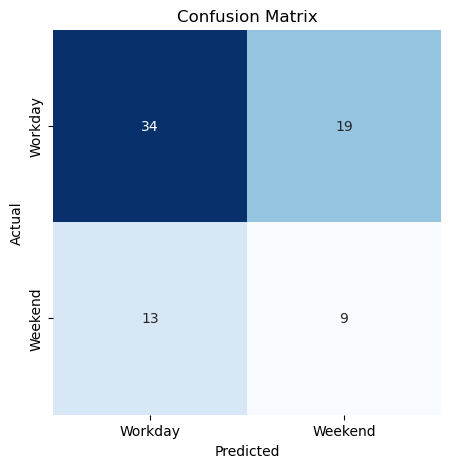

Classification Report: 
------------------------------------------
               precision    recall  f1-score   support

     Workday       0.72      0.64      0.68        53
     Weekend       0.32      0.41      0.36        22

    accuracy                           0.57        75
   macro avg       0.52      0.53      0.52        75
weighted avg       0.61      0.57      0.59        75



In [73]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=['Workday', 'Weekend'])
clr = classification_report(y_test, y_pred, labels=['Workday', 'Weekend'])

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=['Workday', 'Weekend'])
plt.yticks(ticks=[0.5, 1.5], labels=['Workday', 'Weekend'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report: \n------------------------------------------\n", clr)